# EDA - Home Credit Default Risk 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
file_name = 'data/application_clean.csv'
df = pd.read_csv(file_name)

In [5]:
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age,yrs_employed,yrs_registration,yrs_publish,YRS_LAST_PHONE_CHANGE,flag_doc
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0.0,0.0,0.0,1.0,25,1.7,10.0,5.8,3.1,1
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0.0,0.0,0.0,0.0,45,3.3,3.2,0.8,2.3,1
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0.0,0.0,0.0,0.0,52,0.6,11.7,6.9,2.2,0
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0.0,0.0,0.0,1.0,52,8.3,26.9,6.7,1.7,1
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0.0,0.0,0.0,0.0,54,8.3,11.8,9.5,3.0,1


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.TARGET.value_counts()/len(df)*100
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
#df['avg'] = df[['Monday', 'Tuesday']].mean(axis=1)
#get the average for the EXT_SOURCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 and store in new column
df_application['ext_source_avg'] = df_application[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].mean(axis=1)

Text(0.5, 1.0, 'Payed vs. Unpaid Loans')

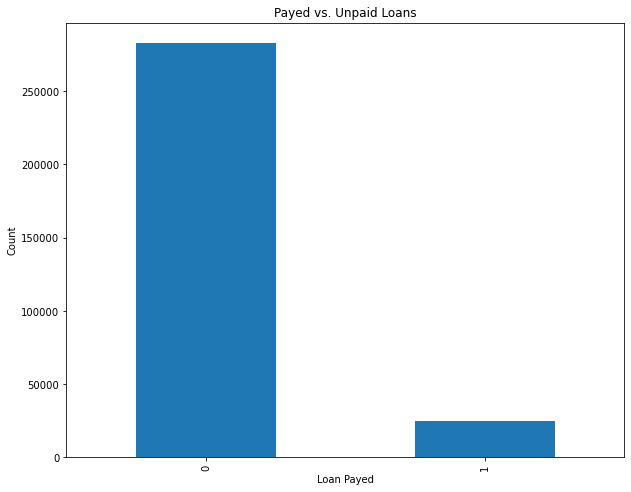

In [8]:
#plot histogram with targets 1 and 0 to see overall credit default 
plt.figure(figsize=(10,8))
df.TARGET.value_counts().plot(kind='bar')
plt.xlabel('Loan Payed')
plt.ylabel('Count')
plt.title('Payed vs. Unpaid Loans')

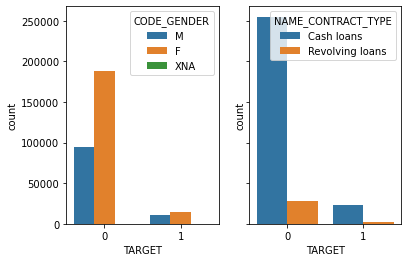

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.suptitle('')
g1=sns.countplot(x='TARGET', hue='CODE_GENDER', data=df, ax=ax1)
g1=sns.countplot(x='TARGET', hue='NAME_CONTRACT_TYPE', data=df, ax=ax2)
plt.show()

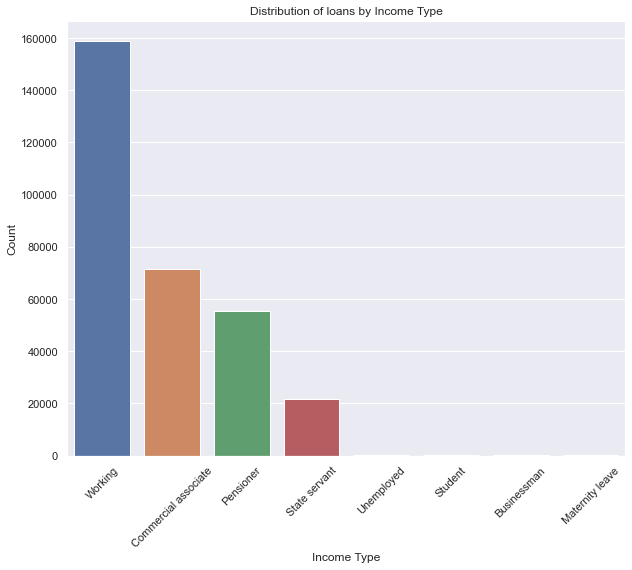

In [10]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
g = sns.countplot(x='NAME_INCOME_TYPE', 
                  data=df,
                 order=df['NAME_INCOME_TYPE'].value_counts().index)
plt.setp(g.get_xticklabels(), rotation=45)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Distribution of loans by Income Type')
plt.show()

Text(0.5, 1.0, 'Payed vs. Unpaid Loans (%)')

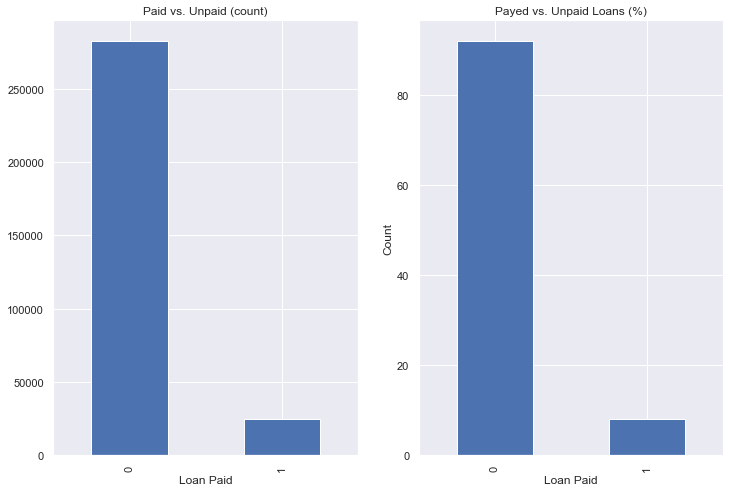

In [11]:
#Create two subplots on 1 row and 2 columns with a figsize of (14, 10)
#get target percentage
target_percent = (df.TARGET.value_counts()/len(df))*100

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
df.TARGET.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Paid vs. Unpaid (count)')
ax[0].set_xlabel('Loan Paid')
target_percent.plot(kind='bar',ax=ax[1])
ax[1].set_xlabel('Loan Paid')
ax[1].set_ylabel('Count')
ax[1].set_title('Payed vs. Unpaid Loans (%)')

Text(0.5, 1.0, 'Loan Types')

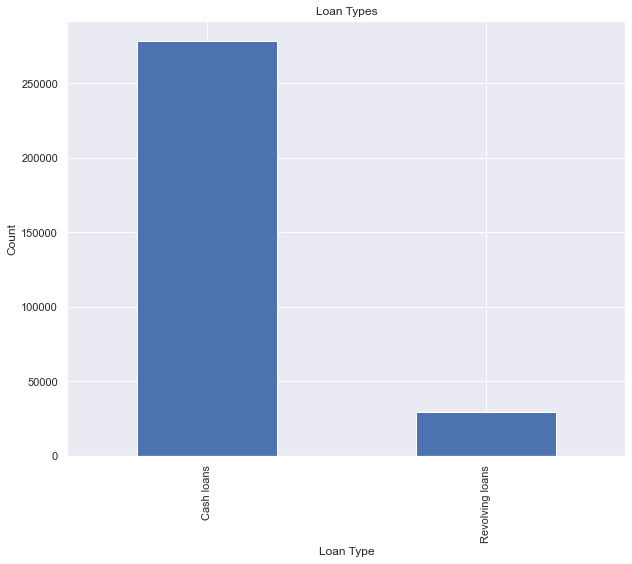

In [12]:
#plot histogram with targets 1 and 0 to see overall credit default 
plt.figure(figsize=(10,8))
df.NAME_CONTRACT_TYPE.value_counts().plot(kind='bar')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.title('Loan Types')

In [14]:
def plotCounts(df, x, order, xlabel, ylabel, title):
    plt.figure(figsize=(10,8))
    sns.set(style='darkgrid')
    g = sns.countplot(x=x, 
                      data=df,
                     order=df[x].value_counts().index)
    plt.setp(g.get_xticklabels(), rotation=60)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

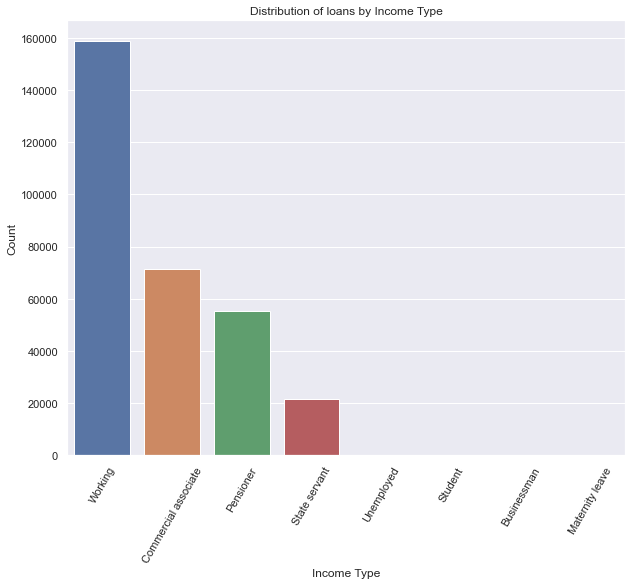

In [15]:
#plot distribution of loans by income type 
plotCounts(df, 'NAME_INCOME_TYPE', 'NAME_INCOME_TYPE' , 'Income Type', 'Count','Distribution of loans by Income Type')

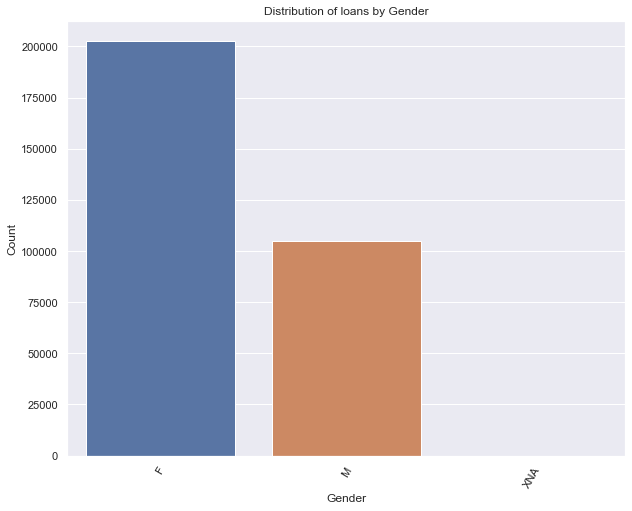

In [16]:

plotCounts(df, 'CODE_GENDER', 'CODE_GENDER' , 'Gender', 'Count','Distribution of loans by Gender')

In [17]:
target1 = df[df['TARGET'] == 1]
target1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   24825 non-null  int64  
 1   SK_ID_CURR                   24825 non-null  int64  
 2   TARGET                       24825 non-null  int64  
 3   NAME_CONTRACT_TYPE           24825 non-null  object 
 4   CODE_GENDER                  24825 non-null  object 
 5   FLAG_OWN_CAR                 24825 non-null  object 
 6   FLAG_OWN_REALTY              24825 non-null  object 
 7   CNT_CHILDREN                 24825 non-null  int64  
 8   AMT_INCOME_TOTAL             24825 non-null  float64
 9   AMT_CREDIT                   24825 non-null  float64
 10  AMT_ANNUITY                  24825 non-null  float64
 11  AMT_GOODS_PRICE              24825 non-null  float64
 12  NAME_TYPE_SUITE              24825 non-null  object 
 13  NAME_INCOME_TYP

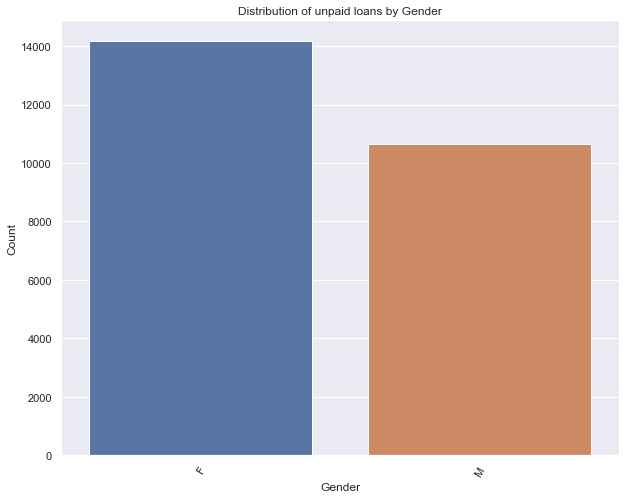

In [18]:
plotCounts(target1, 'CODE_GENDER', 'CODE_GENDER' , 'Gender', 'Count','Distribution of unpaid loans by Gender')

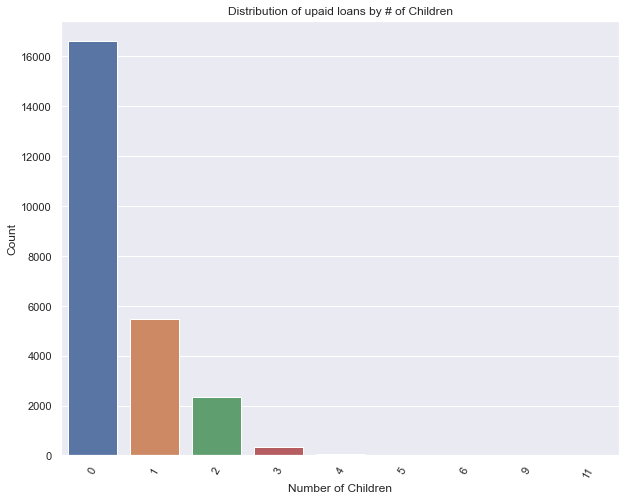

In [19]:
plotCounts(target1, 'CNT_CHILDREN', 'CNT_CHILDREN' , 'Number of Children', 'Count','Distribution of upaid loans by # of Children')

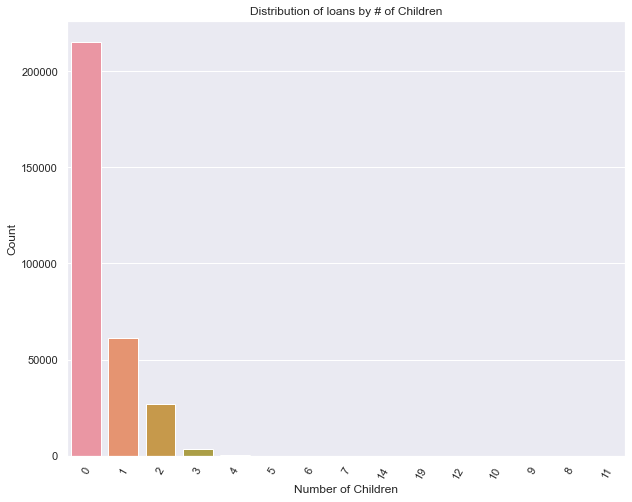

In [20]:
plotCounts(df, 'CNT_CHILDREN', 'CNT_CHILDREN' , 'Number of Children', 'Count','Distribution of loans by # of Children')

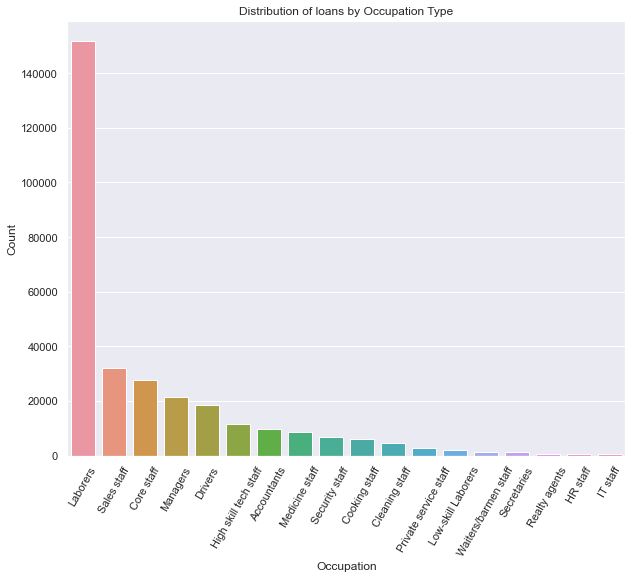

In [21]:
#AMT_INCOME_TOTAL
plotCounts(df, 'OCCUPATION_TYPE', 'OCCUPATION_TYPE' , 'Occupation', 'Count','Distribution of loans by Occupation Type')

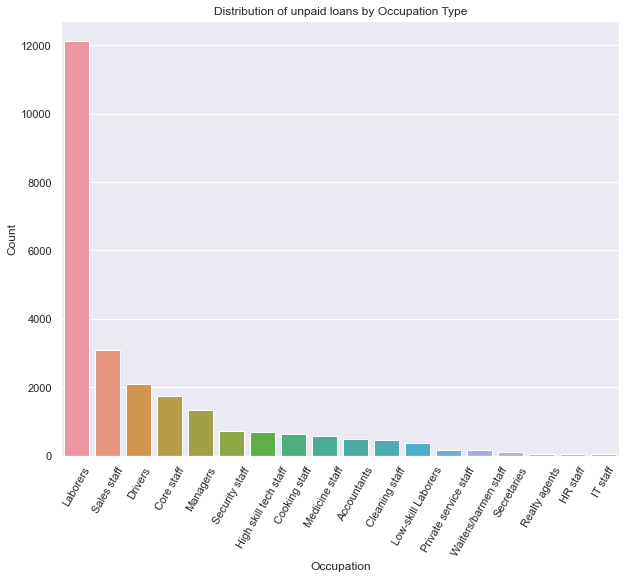

In [22]:
plotCounts(target1, 'OCCUPATION_TYPE', 'OCCUPATION_TYPE' , 'Occupation', 'Count','Distribution of unpaid loans by Occupation Type')

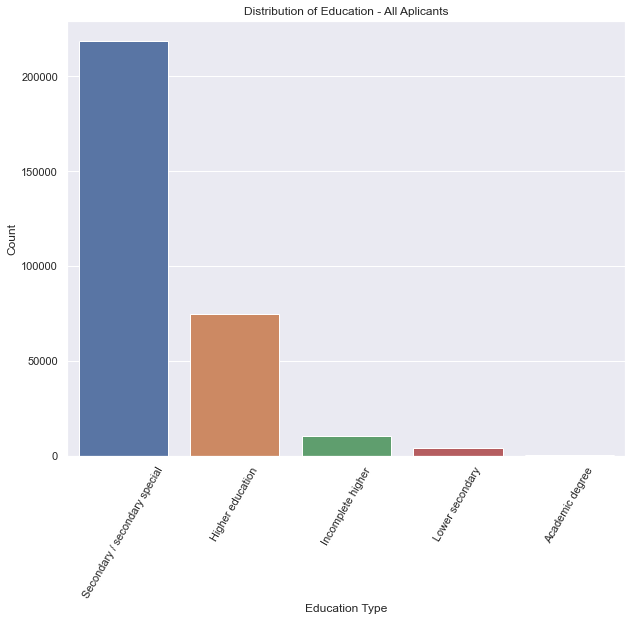

In [24]:
plotCounts(df, 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE' , 'Education Type', 
           'Count','Distribution of Education - All Aplicants')

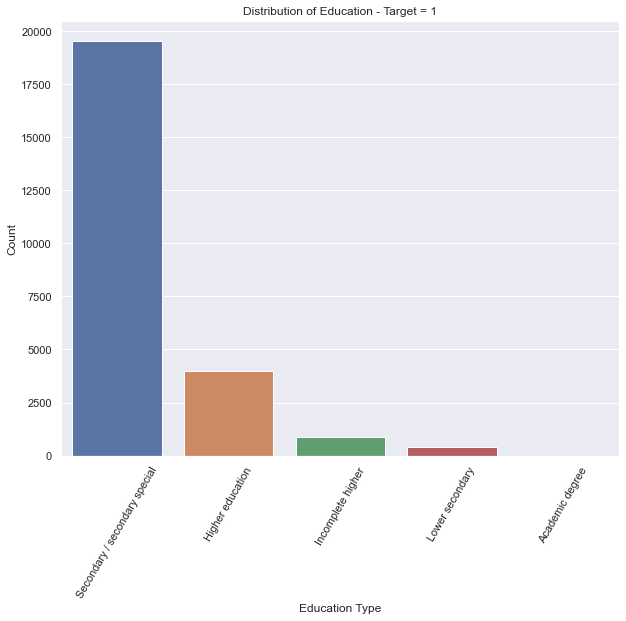

In [25]:
#	NAME_FAMILY_STATUS	NAME_HOUSING_TYPE
plotCounts(target1, 'NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE' , 'Education Type', 
           'Count','Distribution of Education - Target = 1')

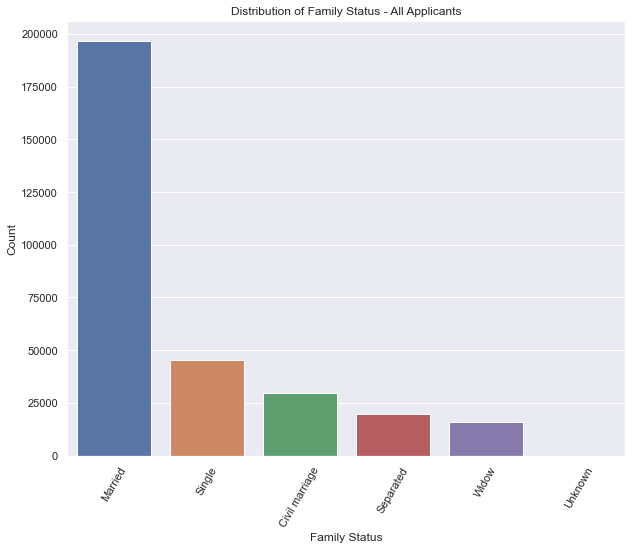

In [26]:

plotCounts(df, 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS' , 'Family Status', 
           'Count','Distribution of Family Status - All Applicants')

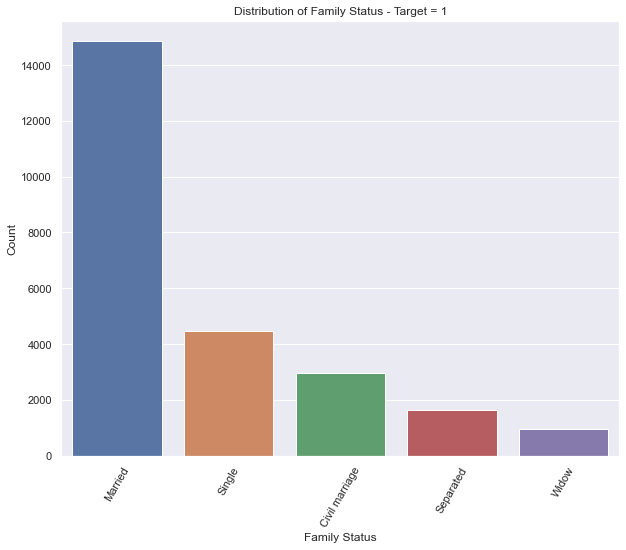

In [27]:
plotCounts(target1, 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS' , 'Family Status', 
           'Count','Distribution of Family Status - Target = 1')

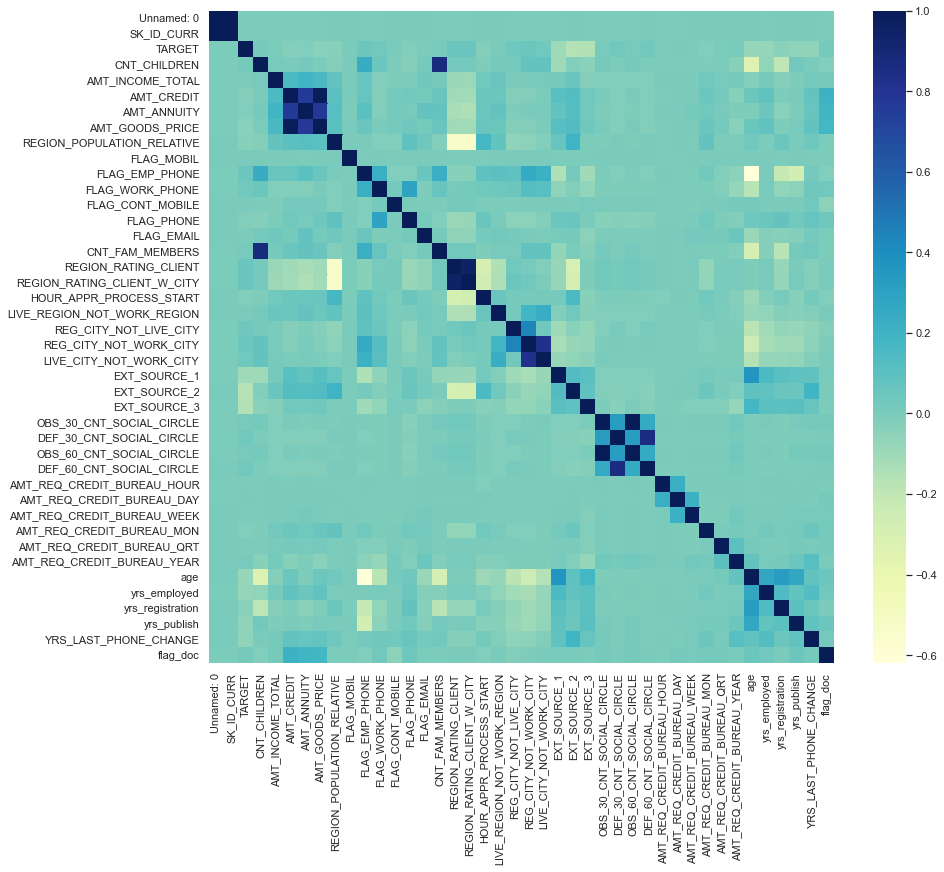

In [48]:
plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(),cmap='YlGnBu');

Text(0.5, 1.0, 'Distribution of Credit Amount')

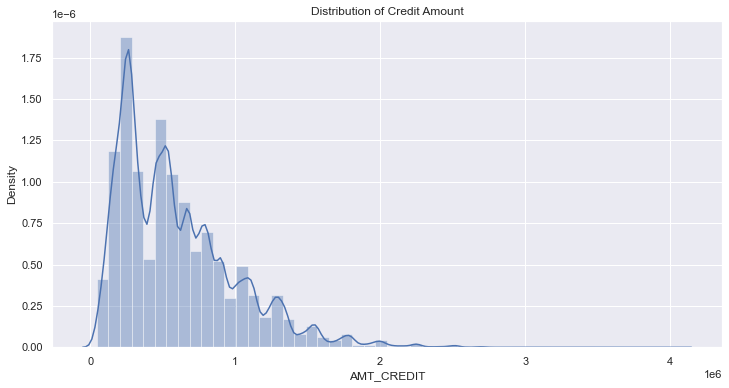

In [29]:
#Distribution of AMT_CREDIT 
plt.figure(figsize=(12,6))
sns.distplot(df['AMT_CREDIT'])
plt.title('Distribution of Credit Amount')

Text(0.5, 1.0, 'Distribution of Number of Children')

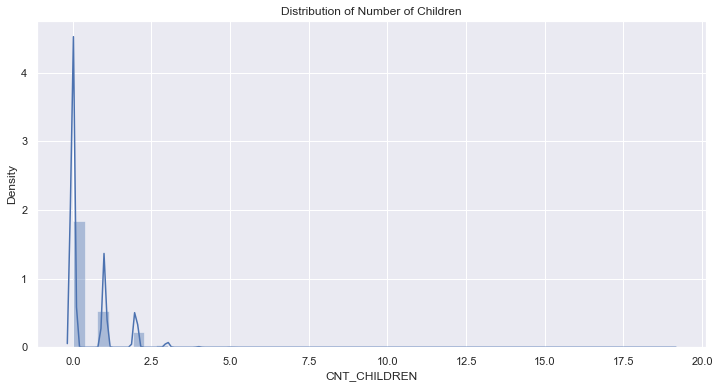

In [30]:
#Distribution of AMT_CREDIT 
plt.figure(figsize=(12,6))
sns.distplot(df['CNT_CHILDREN'])
plt.title('Distribution of Number of Children')

Text(0.5, 1.0, 'Distribution of Goods Price Amount')

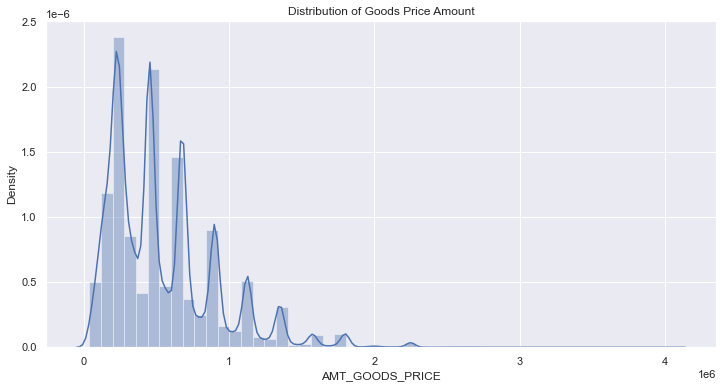

In [31]:
#Distribution of AMT_CREDIT 
plt.figure(figsize=(12,6))
sns.distplot(df['AMT_GOODS_PRICE'])
plt.title('Distribution of Goods Price Amount')

Text(0.5, 1.0, 'Distribution of Age')

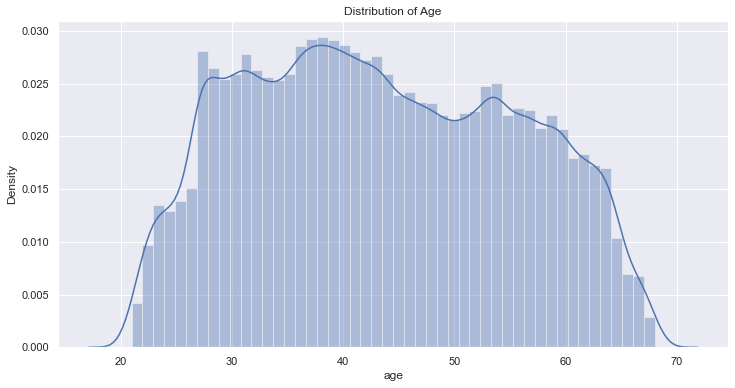

In [32]:
#Distribution of AMT_CREDIT 
plt.figure(figsize=(12,6))
sns.distplot(df['age'])
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Years of Employment')

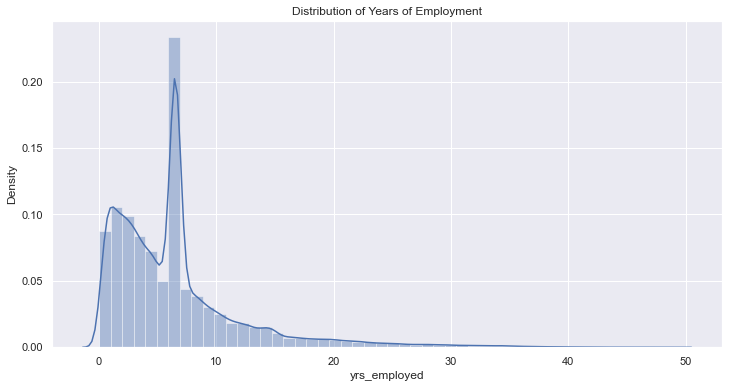

In [33]:
#Distribution of AMT_CREDIT 
plt.figure(figsize=(12,6))
sns.distplot(df['yrs_employed'])
plt.title('Distribution of Years of Employment')

Text(0.5, 1.0, 'Distribution of EXT_SOURCE_1')

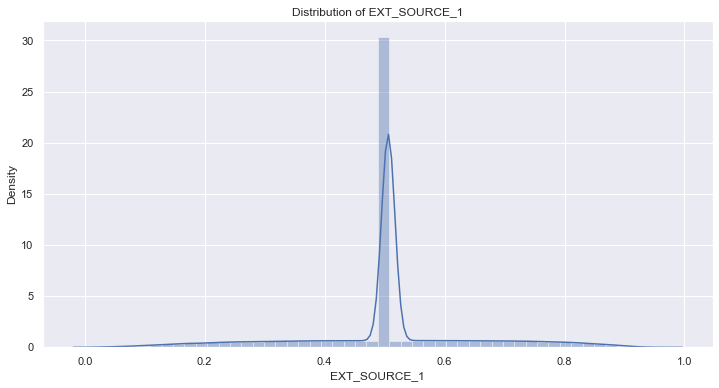

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(df['EXT_SOURCE_1'])
plt.title('Distribution of EXT_SOURCE_1')

Text(0.5, 1.0, 'Distribution of EXT_SOURCE_2')

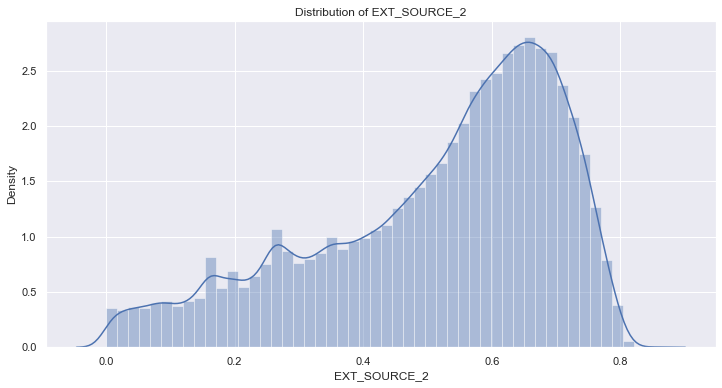

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(df['EXT_SOURCE_2'])
plt.title('Distribution of EXT_SOURCE_2')

Text(0.5, 1.0, 'Distribution of EXT_SOURCE_3')

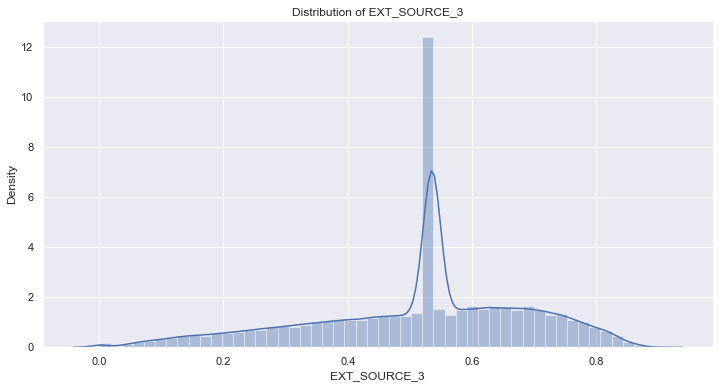

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(df['EXT_SOURCE_3'])
plt.title('Distribution of EXT_SOURCE_3')

Text(0.5, 1.0, 'Distribution of Number of Family Members')

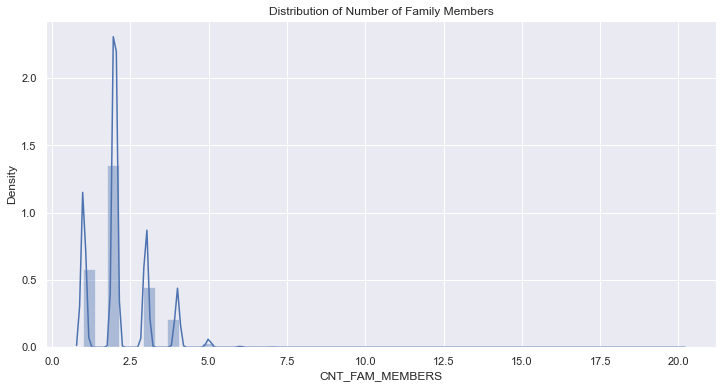

In [38]:
plt.figure(figsize=(12,6))
sns.distplot(df['CNT_FAM_MEMBERS'])
plt.title('Distribution of Number of Family Members')

Text(0.5, 1.0, 'Distribution of Number of Family Members')

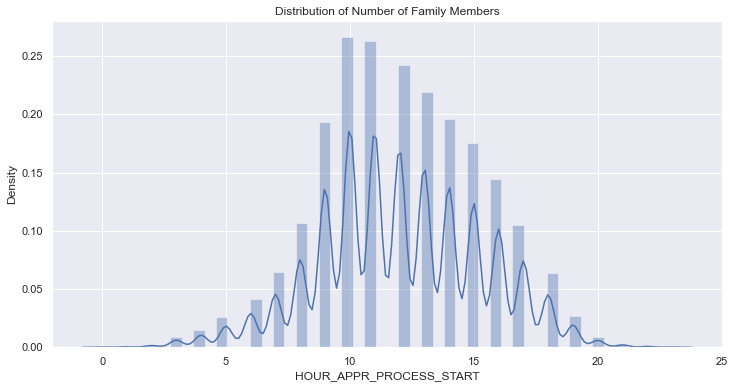

In [39]:
plt.figure(figsize=(12,6))
sns.distplot(df['HOUR_APPR_PROCESS_START'])
plt.title('Distribution of Number of Family Members')

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,307511.0,153755.000000,88770.923652,0.000000e+00,76877.500000,153755.000000,230632.500000,3.075100e+05
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.573909,14493.454517,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538316.294367,369288.982246,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
FLAG_MOBIL,307511.0,0.999997,0.001803,0.000000e+00,1.000000,1.000000,1.000000,1.000000e+00


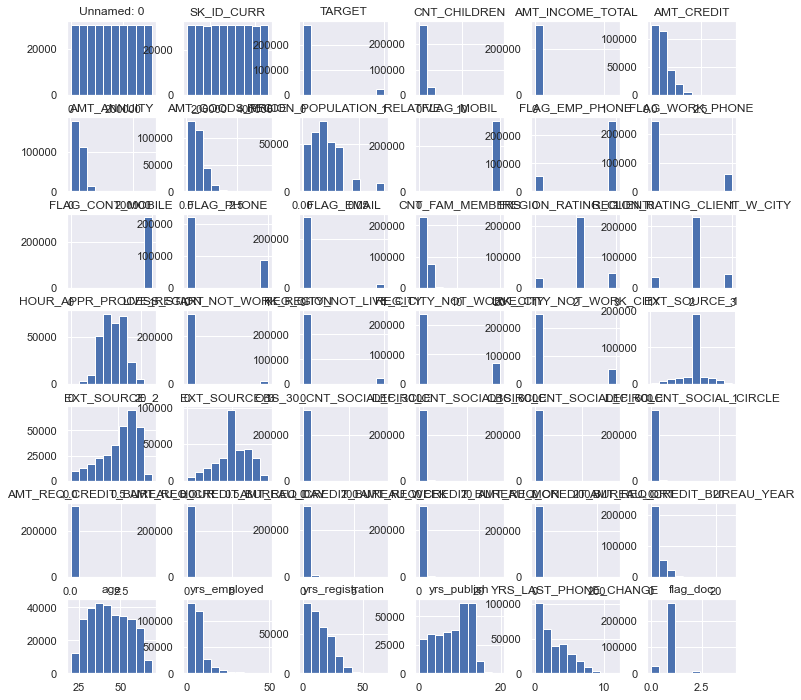

In [42]:
#histograms for each variable in df
hist = df.hist(bins=10,figsize =(12,12))

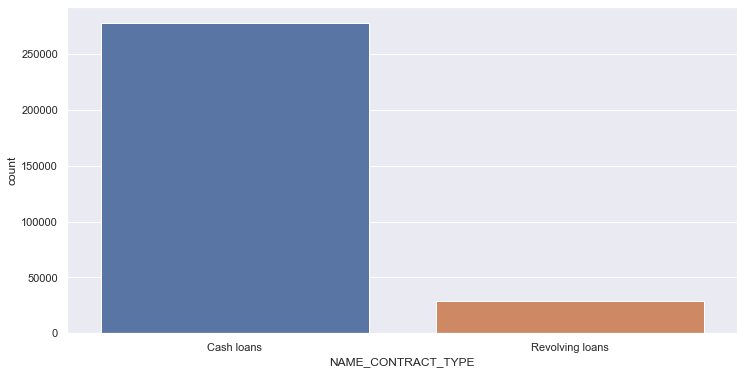

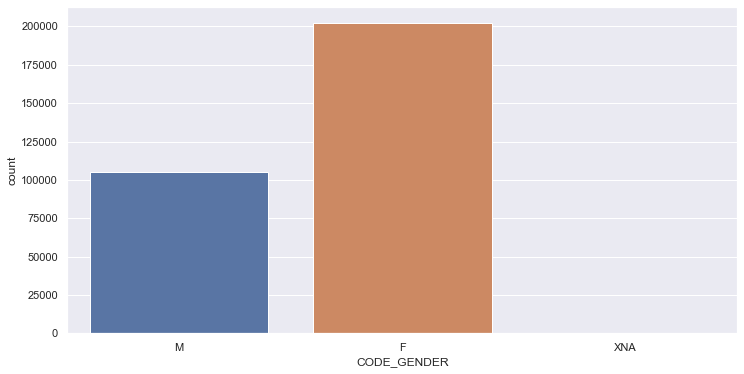

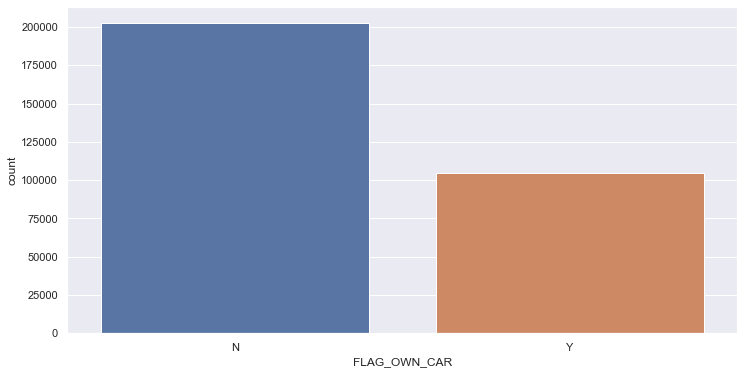

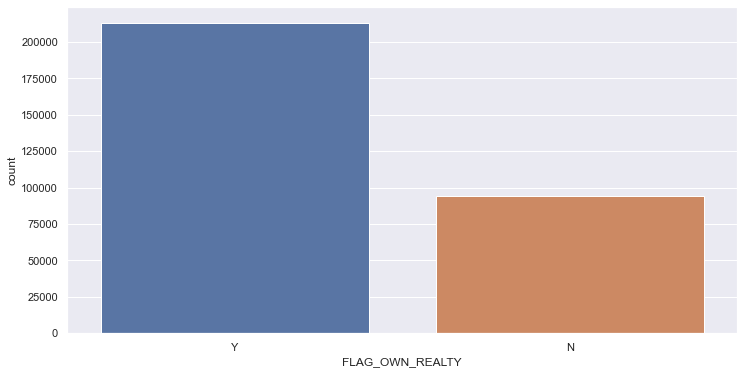

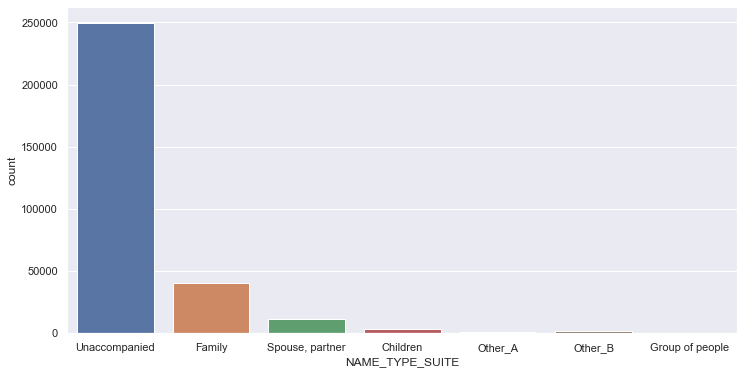

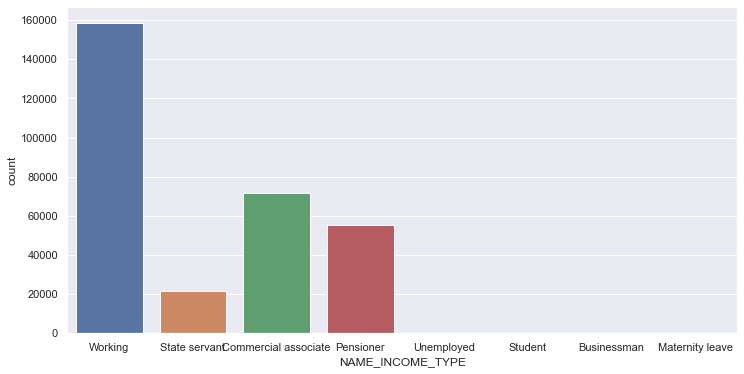

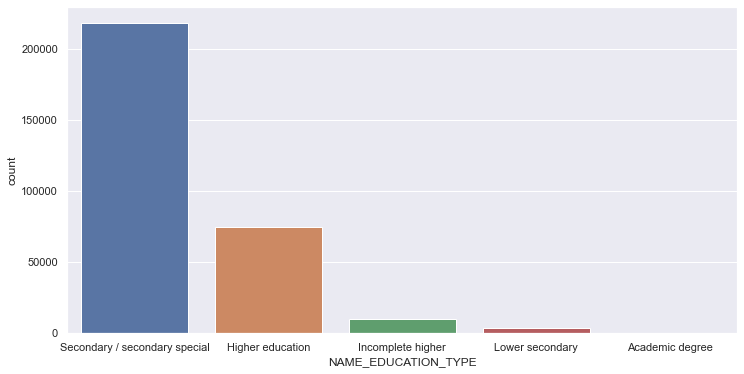

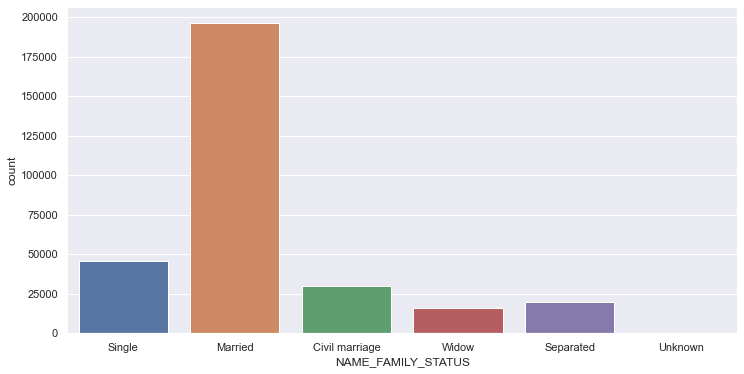

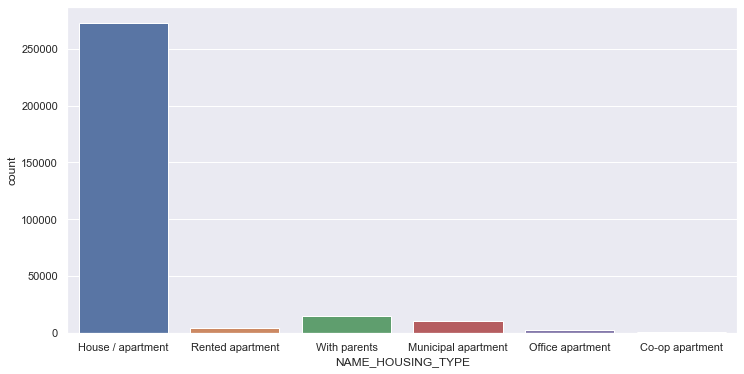

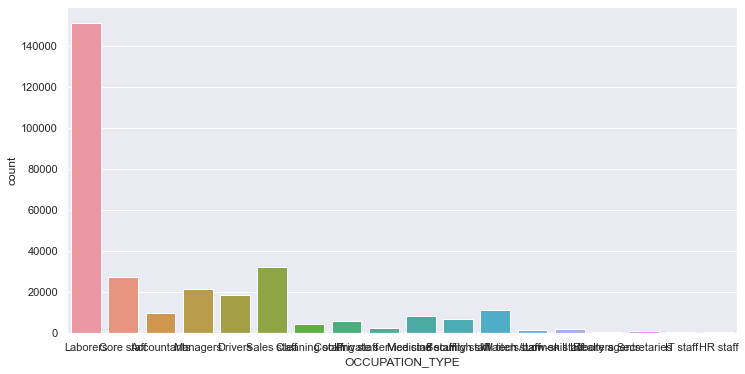

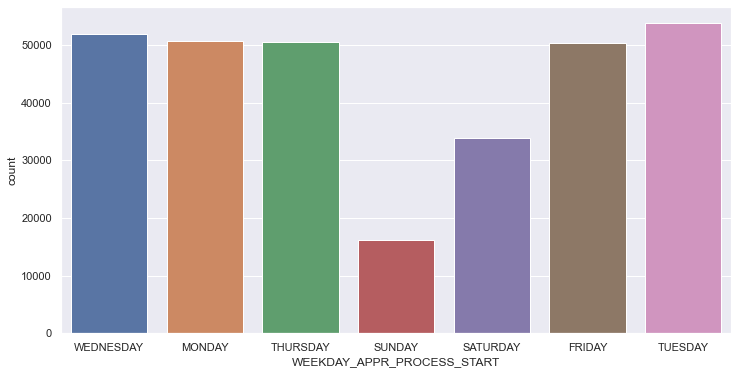

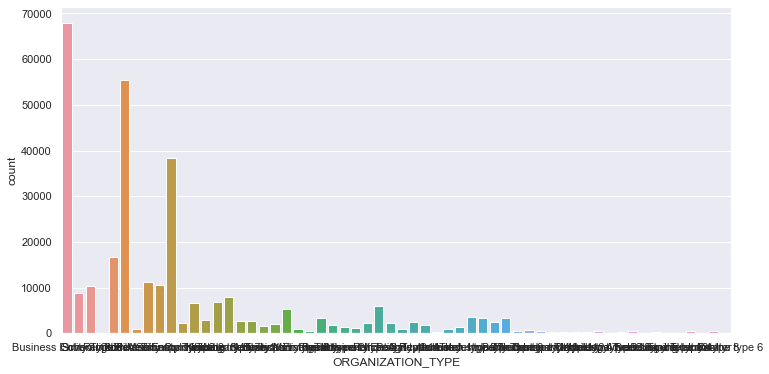

In [46]:
#select categorical variables only
df_cat = df.select_dtypes(include = 'object').copy()

#get counts of each variable value
for col in df_cat.columns:
    #count plot for one variable
    plt.figure(figsize=(12,6))
    sns.countplot(data = df_cat, x = col)
        
    plt.show()